

# Tech challenge

<p align="center"> 
<img src="https://kamisetas.com/image/bordados/Cobi-Barcelona-92-parche.gif" alt="drawing" width="200"/>
</p>


Cobify is a company dedicated to people transport just like Uber, Lyft or even Cabify (who clearly stole our name).

Cobify was founded in 1992 coinciding with the Olympic Games hosted in Barcelona. Our company has always been known by:

- Not having permits to drive people (we do know how to drive)
- Using tricked-out high-end car

In our home town, Barcelona, VTC licenses have appeared and we have been able to start being a legal company, because we do have licenses now. However, we still keep using tricked-out high-end cars.

We are an old school company and data analysis falls far beyond our reach, and as we do not want to be on the news we want to know how you can help our business.

#### A bit of history of the gas problem ⛽️

Tricked-out cars use gas with a high cetane index, like unleaded 98 petrol in order to avoid delay/advancing in combustible injection (avoiding connecting rod pitting ), but we have started to embrace petrols that add ethanol in their formula, as they are cheaper and they use the same cetane index as more expensive petrol. Without going into further detail (we could write an actual book about this) we think that going green and being modern can be very expensive, as we have seen that cars use more petrol than they used to for each trip.

#### Your challenge starts here 📈

Now it is your turn: can you help us find the best combustible?
We have saved some consumption data in a .csv, but… it would be very nice if you could add some more data. You can find data in the repo :-)

Show us your abilities and make yourself worth the amount of money you'd like to get paid. You have **3 hours** to turn the challenge in starting right now! 💸

## What to do?

### You should aim for:

#### Exploratory data analysis

- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data

Note: Above you have your data set in a folder but for further reference here is the data set source: https://www.kaggle.com/datasets/anderas/car-consume

#### Visualization

- Plot your data in a meaningful way

#### Predictions

- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?

#### Storytelling

- What metrics are you obtaining?
- Explain your conclusions
- Shape your new data and conclusions in such a way that is appealing to the listener and tells a story


### Extra:
#### Enrich your dataset

- Add value: obtain related data by web scraping or with APIs.

#### Database

- Load the processed information into a database

<br>


## Submission

To deliver your proposal make a fork of the repo and when you are done make a pull request. 🤯

<details>
<summary>How to do a pull request</summary>
<ol>
    <li>Fork this repository</li>
    <li>Clone it</li>
    <li>Work on it</li>
    <li>Push the changes to your fork</li>
    <li>From your fork, click on Contribute</li>
    <li>Open pull request</li>
    <li>Name it:  [Name FamilyName] Tech challenge</li>
</ol>
</details>

Do not forget to add any PDF document, slides or anything you can think of.

You can grab ideas from our instructors or create something with [streamlit](https://www.streamlit.io/) 🚀

Go bezerk if you want to get this job, you will set the limits!

_PD: even though this has an informal tone, this challenge is serious and very similar to those you will encounter in real life._
    

Originally from [@VictorRodriguezIronhack](https://github.com/VictorRodriguezIronhack)


## Reading the data & importing the libraries

In [54]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('Solarize_Light2')

%matplotlib inline

pd.set_option('display.max_columns', None)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [55]:
df = pd.read_csv('measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## EDA

In [56]:
print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns')

The dataframe has 388 rows and 12 columns


I want to standardise the column names

In [57]:
columns = []
for i in range (len(df.columns)):
    columns.append(df.columns[i].lower().replace(" ", "_"))
df.columns = columns #we replace the original column names with the standarized ones
df.head()  

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,ac,rain,sun,refill_liters,refill_gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   ac             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill_liters  13 non-null     object
 11  refill_gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


* `specials`, ` temp_inside`, `refill_liters` and `refill_gas` columns have null values inside.
* all columns, except `gas_type` and `refill_gas` should be converted into numeric

In [59]:
round(df.isna().sum()/len(df),4)*100

distance          0.00
consume           0.00
speed             0.00
temp_inside       3.09
temp_outside      0.00
specials         76.03
gas_type          0.00
ac                0.00
rain              0.00
sun               0.00
refill_liters    96.65
refill_gas       96.65
dtype: float64

I will drop `specials`, `refill_liters` and `refill_gas` becasue they has too many null values

In [60]:
df = df.drop(['specials', 'refill_liters','refill_gas'], axis = 1 )
df.dropna(subset=['temp_inside'], inplace=True) # I remove the null values from tem_inside
df.isna().sum() # then we check if the null values have been removed

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
ac              0
rain            0
sun             0
dtype: int64

In [61]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,ac,rain,sun
0,28,5,26,"21,5",12,E10,0,0,0
1,12,"4,2",30,"21,5",13,E10,0,0,0
2,"11,2","5,5",38,"21,5",15,E10,0,0,0
3,"12,9","3,9",36,"21,5",14,E10,0,0,0
4,"18,5","4,5",46,"21,5",15,E10,0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   distance      376 non-null    object
 1   consume       376 non-null    object
 2   speed         376 non-null    int64 
 3   temp_inside   376 non-null    object
 4   temp_outside  376 non-null    int64 
 5   gas_type      376 non-null    object
 6   ac            376 non-null    int64 
 7   rain          376 non-null    int64 
 8   sun           376 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 29.4+ KB


In [63]:
# I convert some columns into numericals
object_columns = ['distance', 'consume', 'temp_inside']
def remove_commas(df): # this is a function that replaces the comma 
    for col in object_columns:
        df[col] = [x.replace(',', '.') for x in df[col]]


remove_commas(df)

In [64]:
df[['distance','consume','temp_inside']] = df[['distance','consume','temp_inside']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376 entries, 0 to 387
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   distance      376 non-null    float64
 1   consume       376 non-null    float64
 2   speed         376 non-null    int64  
 3   temp_inside   376 non-null    float64
 4   temp_outside  376 non-null    int64  
 5   gas_type      376 non-null    object 
 6   ac            376 non-null    int64  
 7   rain          376 non-null    int64  
 8   sun           376 non-null    int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 29.4+ KB


### Exploring the categoricals

In [65]:
# to see if we need to clean the categorical values, we check the unique values in categorical columns
categorical = df.select_dtypes('object') # first we define what categorical columns are

# a function to check the uniqu values in a dataframe
def check_unique_values(df):
    for col in df:
        print(list(df[col].unique()))

check_unique_values(categorical)

['E10', 'SP98']


There is only one categorical column with only 2 values. I can already assume here, that I could use a logistic regression. 

### Exploring numericals

In [66]:
numeric = df.select_dtypes(include=np.number) # create a numerical df
numeric.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0


In [67]:
numeric.describe().apply(lambda x: round(x,1))

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
count,376.0,376.0,376.0,376.0,376.0,376.0,376.0,376.0
mean,19.8,4.9,42.0,21.9,11.3,0.1,0.1,0.1
std,23.0,1.0,13.7,1.0,7.1,0.3,0.3,0.3
min,1.3,3.3,14.0,19.0,-5.0,0.0,0.0,0.0
25%,11.8,4.3,32.0,21.5,6.0,0.0,0.0,0.0
50%,14.6,4.7,40.5,22.0,10.0,0.0,0.0,0.0
75%,19.0,5.3,50.0,22.5,16.0,0.0,0.0,0.0
max,216.1,12.2,90.0,25.5,31.0,1.0,1.0,1.0


In [68]:
print(f'There are {len(numeric.columns)} numeric columns and {len(categorical.columns)} categorical columns')
print(f'The categorical columns are {categorical.columns.tolist()}')
print(f'The numerical columns are {numeric.columns.tolist()}')

There are 8 numeric columns and 1 categorical columns
The categorical columns are ['gas_type']
The numerical columns are ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'ac', 'rain', 'sun']


### Correlation

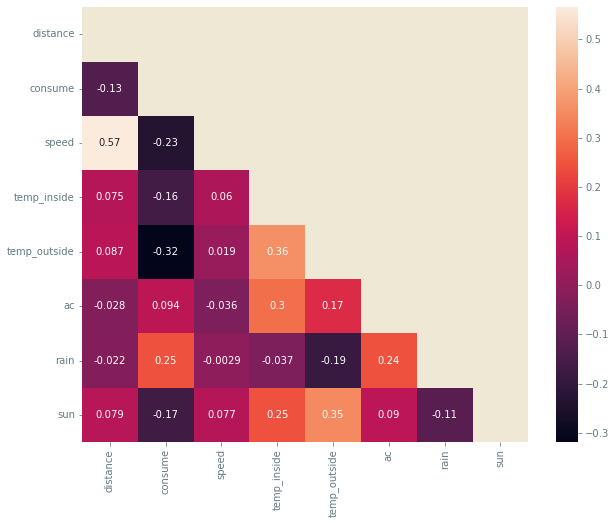

In [69]:
#HEATMAP
mask = np.zeros_like(numeric.corr())
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(numeric.corr(), mask=mask, annot=True)
plt.show()

the correlation between the columns seems tolerable. The highest correlation is between `speed` and `distance`. But it is not too high to be removed, so i decided to keep them. 

## Visualisation

Visual distribution of  the continuous data

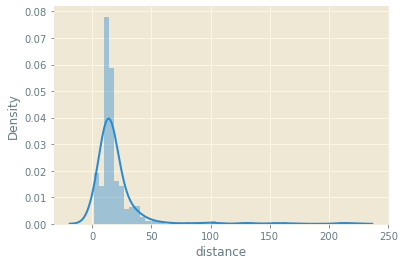

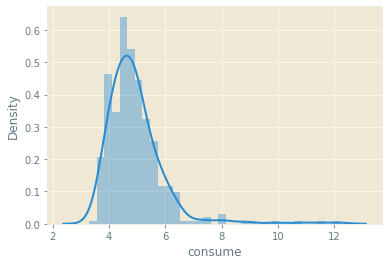

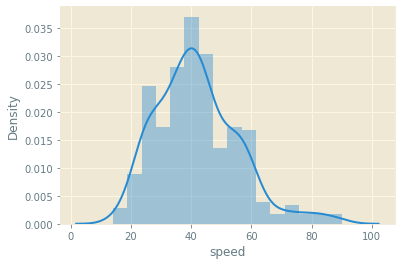

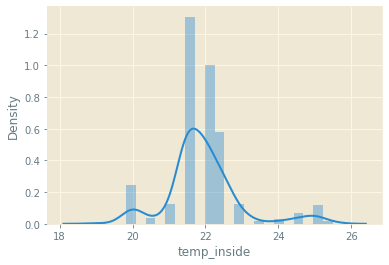

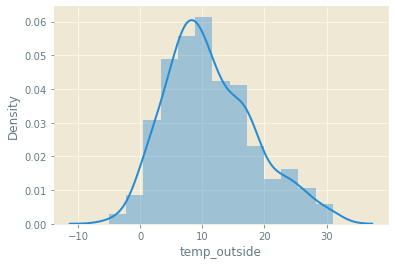

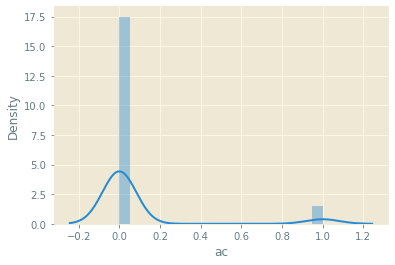

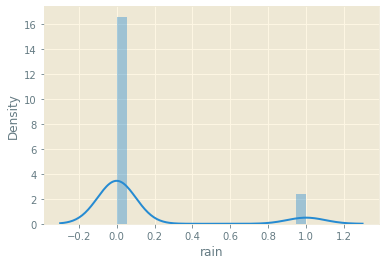

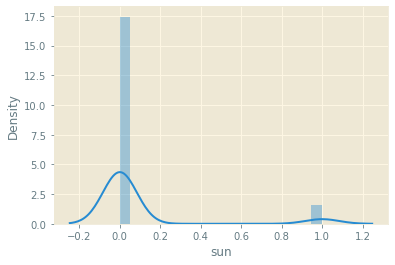

In [70]:
for column in numeric.columns:
    sns.distplot(numeric[column])
    plt.show()

## Data pre-processing

### Treating outliers

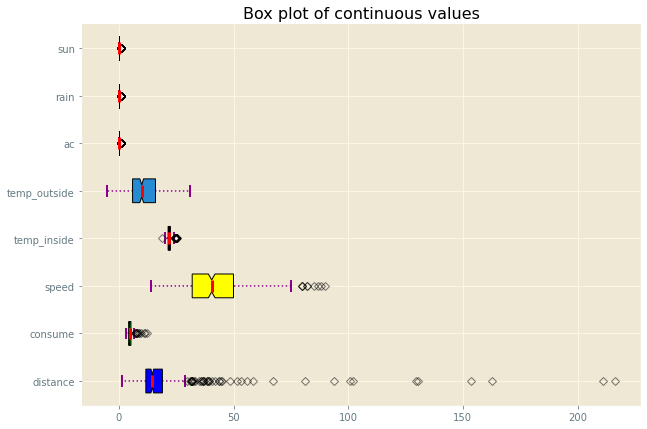

In [71]:
# to see the outliers of the columns with continuous variables in a boxplot
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(numeric, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(numeric.columns)
 
# Adding title
plt.title("Box plot of continuous values")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

The outliers in the `distance` column are located too far away from the median that is shown in red. 
We can remove the outliers, but we need to be careful not to remove too much data. Therefore, we first need to check how many outlliers there are and if the number is not too big we can remove them. If we remove too much, we face the problem of loosing to much data. 

I check how many outliers there are in the distance column. First we write a function to find the outliers, and then apply that function to continuous_df['distance']

In [72]:
#The function to find outliers:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-2*IQR)) | (df>(q3+2*IQR)))] # initially I used 1.5 instead of 2, but it was showing too many outliers (1441 to be precise), so I decided to increase the threshold. 

   return outliers

Here I am trying to see the minimum and maximum value of average_balance.

In [73]:
q1_ab=numeric['distance'].quantile(0.25)
q3_ab=numeric['distance'].quantile(0.75)
IQR=q3_ab-q1_ab
print(q1_ab-2*IQR, ' is the minimum value')
print(q3_ab+2*IQR, ' is the maximum value')


-2.599999999999998  is the minimum value
33.4  is the maximum value


We apply the function to find the outliers in continuous_df['distance']

In [74]:
outliers_average_balance = find_outliers_IQR(numeric['distance'])

print('number of outliers: '+ str(len(outliers_average_balance)))

print('max outlier value: '+ str(outliers_average_balance.max()))

print('min outlier value: '+ str(outliers_average_balance.min()))


number of outliers: 34
max outlier value: 216.1
min outlier value: 34.8


Now we need to check the proportion of the outliers. 

In [75]:
p = (len(outliers_average_balance) * 100)/ numeric.shape[0]
print('There are ', len(numeric), 'values in the column `distance` and ', p, 'percent are outliers')

There are  376 values in the column `distance` and  9.042553191489361 percent are outliers


We can conclude that since there is a high number of outliers, we can NOT remove them from the `distance`.

### Normalizing the data

In [76]:
transformer = StandardScaler().fit(numeric)
num_standard = transformer.transform(numeric)
num_standard = pd.DataFrame(num_standard,index=numeric.index, columns=numeric.columns.tolist())
num_standard.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun
0,0.357285,0.071907,-1.165108,-0.425643,0.093456,-0.294457,-0.377964,-0.299758
1,-0.339631,-0.697827,-0.873055,-0.425643,0.235147,-0.294457,-0.377964,-0.299758
2,-0.374477,0.552990,-0.288947,-0.425643,0.518530,-0.294457,-0.377964,-0.299758
3,-0.300429,-0.986478,-0.434974,-0.425643,0.376839,-0.294457,-0.377964,-0.299758
4,-0.056509,-0.409177,0.295161,-0.425643,0.518530,-0.294457,-0.377964,-0.299758


## Predictions

I decided to make a model that will predict the gas type, whether its E10 or SP98

### Train/Test Split

In [77]:
# we separate the target column from the rest
target = categorical
# we check if the target column matches size-wise with our dataframe. 
print(f'The original dataframe has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The target dataframe has {target.shape[0]} rows and {target.shape[1]} columns')

The original dataframe has 376 rows and 9 columns
The target dataframe has 376 rows and 1 columns


In [78]:
target.value_counts() # to check how the target looks

gas_type
SP98        219
E10         157
dtype: int64

In [79]:
full_with_target = pd.merge(num_standard, target, how='left', left_index=True, right_index=True)  
target = full_with_target['gas_type']
target = pd.DataFrame(target)
target.shape

(376, 1)

In [80]:
from sklearn.linear_model import LogisticRegression
y = target['gas_type']
X = num_standard

# We separate training and testing datasets and correspondant targets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [81]:
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.5309734513274337

### Model evaluation

In [82]:
print(y_test.value_counts())
print(y.value_counts())

E10     57
SP98    56
Name: gas_type, dtype: int64
SP98    219
E10     157
Name: gas_type, dtype: int64


In [83]:
pd.value_counts(predictions)

SP98    95
E10     18
dtype: int64

In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[11, 46],
       [ 7, 49]], dtype=int64)

In [85]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.53



Findings:
* The model performed pretty bad, so I have to try making it better. For that I will try using data imbalance techniques such as downsampling and upsampling. 

### Upsampling and downsampling

Downsampling

In [86]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus = RandomUnderSampler()
y = target['gas_type']
X = num_standard
X_rus, y_rus = rus.fit_resample(X, y)
y.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

In [87]:
y_rus.value_counts()

E10     157
SP98    157
Name: gas_type, dtype: int64

In [88]:
transformer = StandardScaler().fit(X_rus)
X = transformer.transform(X_rus)


X_train, X_test, y_train, y_test = train_test_split(X, y_rus, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.5157894736842106

In [89]:
# Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.52



In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[32,  6],
       [40, 17]], dtype=int64)

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         E10       0.44      0.84      0.58        38
        SP98       0.74      0.30      0.42        57

    accuracy                           0.52        95
   macro avg       0.59      0.57      0.50        95
weighted avg       0.62      0.52      0.49        95



* Downsampling did not help much. 
* The accuracy after downsampling < before downsampling
* 52 % < 53%

Upsampling

In [92]:
ros = RandomOverSampler()
y = target['gas_type']
X = num_standard
X_ros, y_ros = ros.fit_resample(X, y)
y.value_counts()

SP98    219
E10     157
Name: gas_type, dtype: int64

In [93]:
y_ros.value_counts()

E10     219
SP98    219
Name: gas_type, dtype: int64

In [94]:
transformer = StandardScaler().fit(X_ros)
X = transformer.transform(X_ros)

X_train, X_test, y_train, y_test = train_test_split(X, y_ros, test_size=0.3, random_state=100)
classification = LogisticRegression(random_state=0, multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)

classification.score(X_test, y_test)

0.6212121212121212

In [95]:
 # Accuracy
from sklearn.metrics import accuracy_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.62



In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[41, 26],
       [24, 41]], dtype=int64)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         E10       0.63      0.61      0.62        67
        SP98       0.61      0.63      0.62        65

    accuracy                           0.62       132
   macro avg       0.62      0.62      0.62       132
weighted avg       0.62      0.62      0.62       132



Upsampling significantly increased the accuracy. 
* 62 % > 53%

## Conclusion & Further research

* Overall, even after treating the data imbalance, my model does not perform very well. The highest accurracy I could reach was 63 % with the help of upsampling. 
* Due to the time limit I was not able to look into numerical data in more detail. I would have looked into discrete and continuous data separately. 
* The original data set is not very large, so maybe a bigger dataset would have produced different results. 
* I was initially planning to also do a linear regression on care fuel consumption using the column `consume` as the target  column, but due to the time limit I was only able to finish the logistic regression model. 